In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
train=pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')

test=pd.read_csv("Corona_NLP_test.csv",encoding='latin-1')

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
train.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
train.shape

(41157, 6)

In [6]:
train['Location'].mode()

0    London
Name: Location, dtype: object

In [7]:
train.duplicated().sum()

0

In [8]:
#train.fillna('mode',inplace=True)
print(train.Location.value_counts(normalize= True, dropna= False)[:30] *100)

NaN                        20.871298
London                      1.312049
United States               1.282892
London, England             1.263455
New York, NY                0.959740
Washington, DC              0.906286
United Kingdom              0.818816
Los Angeles, CA             0.682751
India                       0.651165
UK                          0.563695
Australia                   0.546687
USA                         0.541828
Canada                      0.464077
England, United Kingdom     0.464077
Toronto, Ontario            0.388755
Global                      0.386326
Chicago, IL                 0.376607
California, USA             0.371747
San Francisco, CA           0.369317
Boston, MA                  0.364458
New York, USA               0.340161
New Delhi, India            0.335301
Atlanta, GA                 0.306145
New York                    0.306145
Mumbai, India               0.264840
Worldwide                   0.245402
Lagos, Nigeria              0.240542
H

In [9]:
train.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [11]:
test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [12]:
test['Location'].mode()

0    United States
Name: Location, dtype: object

In [13]:
#test.fillna('mode',inplace=True)
print(train.Location.value_counts(normalize= True, dropna= False)[:30] *100)

NaN                        20.871298
London                      1.312049
United States               1.282892
London, England             1.263455
New York, NY                0.959740
Washington, DC              0.906286
United Kingdom              0.818816
Los Angeles, CA             0.682751
India                       0.651165
UK                          0.563695
Australia                   0.546687
USA                         0.541828
Canada                      0.464077
England, United Kingdom     0.464077
Toronto, Ontario            0.388755
Global                      0.386326
Chicago, IL                 0.376607
California, USA             0.371747
San Francisco, CA           0.369317
Boston, MA                  0.364458
New York, USA               0.340161
New Delhi, India            0.335301
Atlanta, GA                 0.306145
New York                    0.306145
Mumbai, India               0.264840
Worldwide                   0.245402
Lagos, Nigeria              0.240542
H

In [14]:
test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [15]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [16]:
train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [17]:
#kd['classification']=kd['classification'].replace('ckd\t','ckd')
train['Sentiment']=train['Sentiment'].replace('Extremely Negative','Negative')
train['Sentiment']=train['Sentiment'].replace('Extremely Positive','Positive')

In [18]:
print(train['Sentiment'].unique(),'\n')
print(train['Sentiment'].value_counts())
print(train['Sentiment'].value_counts(normalize=True)*100)

['Neutral' 'Positive' 'Negative'] 

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64
Positive    43.846733
Negative    37.412834
Neutral     18.740433
Name: Sentiment, dtype: float64


In [19]:
test['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [20]:
test['Sentiment']=test['Sentiment'].replace('Extremely Negative','Negative')
test['Sentiment']=test['Sentiment'].replace('Extremely Positive','Positive')

In [21]:
test['Sentiment'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [22]:
from sklearn import preprocessing
from sklearn import metrics

In [23]:
print(test['Sentiment'].value_counts(),'\n')

lb=preprocessing.LabelEncoder()
train['Sentiment']=lb.fit_transform(train['Sentiment'])
test['Sentiment']=lb.fit_transform(test['Sentiment'])

Negative    1633
Positive    1546
Neutral      619
Name: Sentiment, dtype: int64 



In [24]:
print(test['Sentiment'].value_counts(),'\n')
print(test['Sentiment'].unique(),'\n')
print(test['Sentiment'].value_counts())

0    1633
2    1546
1     619
Name: Sentiment, dtype: int64 

[0 2 1] 

0    1633
2    1546
1     619
Name: Sentiment, dtype: int64


In [25]:
train.drop(['UserName','ScreenName'],axis=1,inplace=True)
train.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,NaN,16-03-2020,My food stock is not the only one which is emp...,2
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [26]:
test.drop(['UserName','ScreenName'],axis=1,inplace=True)
test.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,2
2,NaN,02-03-2020,Find out how you can protect yourself and love...,2
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,0
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,1


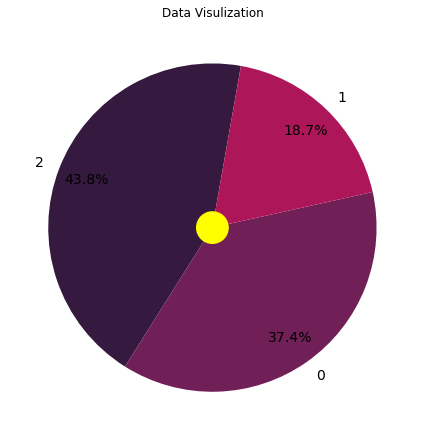

In [27]:
plt.figure(figsize=(6,6))

sentiments = train.Sentiment.value_counts()

sns.set_palette("rocket")
plt.pie(sentiments,
        labels= sentiments.index,
        autopct='%1.1f%%', startangle=80, 
        pctdistance=0.82, textprops={"fontsize": 14})

centreCircle = plt.Circle((0,0),0.1,fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)

plt.tight_layout()
plt.title("Data Visulization")

plt.show()

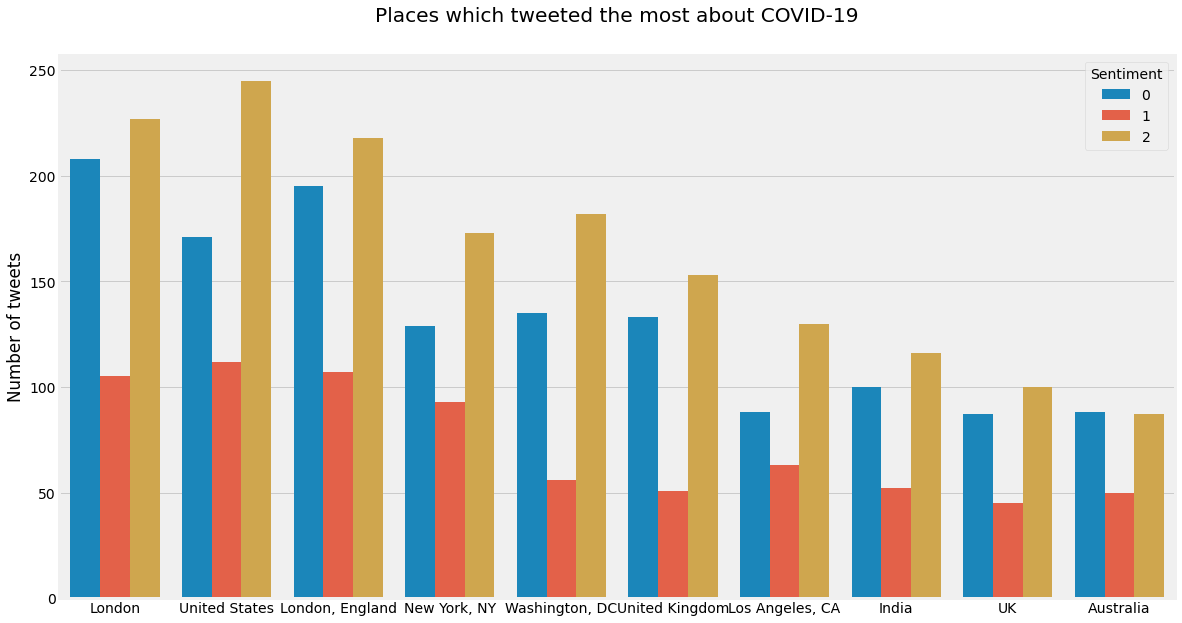

In [28]:
plt.figure(figsize=(20,10))
plt.style.use(style="fivethirtyeight")
figure=sns.countplot(x='Location',data=train,hue='Sentiment',
                     order=train.Location.value_counts()[:10].index)
figure.set_title("Places which tweeted the most about COVID-19", y=1.05)

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(figure)

plt.show()

In [29]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer as ps
data=pd.concat([train,test],ignore_index=True)
data=data.loc[:,['OriginalTweet','Sentiment']]
stop_word=stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Mallikarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,advice Talk to your neighbours family to excha...,2
2,Coronavirus Australia: Woolworths to give elde...,2
3,My food stock is not the only one which is emp...,2
4,"Me, ready to go at supermarket during the #COV...",0
...,...,...
44950,Meanwhile In A Supermarket in Israel -- People...,2
44951,Did you panic buy a lot of non-perishable item...,0
44952,Asst Prof of Economics @cconces was on @NBCPhi...,1
44953,Gov need to do somethings instead of biar je r...,0


In [31]:
def clean_tweet(text):
    text = re.sub(r"#\w+", " ", text)            # remove hashtags
    text = re.sub(r"@\w+", " ",text)             # remove mentions
    text = re.sub(r"http\S+", " ", text)         # remove urls
    text = re.sub(r"[^a-zA-Z]", " ", text)        # remove non-words (digits, punctuations etc)
    text = text.lower().strip()                  # convert tweet to lowercase and strip
    
    text = " ".join([word for word in text.split() if not word in stop_word])           # remove stop words    
    
    text = " ".join(nltk.word_tokenize(text))           # tokenize text
      
    return text

In [32]:
#data_final2=data['OriginalTweet'].apply(clean_tweet)

In [33]:
data_final = data['OriginalTweet'].apply(lambda x: clean_tweet(x))

In [34]:
data_final

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia woolworths give elderly ...
3        food stock one empty please panic enough food ...
4        ready go supermarket outbreak paranoid food st...
                               ...                        
44950    meanwhile supermarket israel people dance sing...
44951    panic buy lot non perishable items echo needs ...
44952    asst prof economics talking recent research co...
44953    gov need somethings instead biar je rakyat ass...
44954    members committed safety employees end users m...
Name: OriginalTweet, Length: 44955, dtype: object

In [35]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

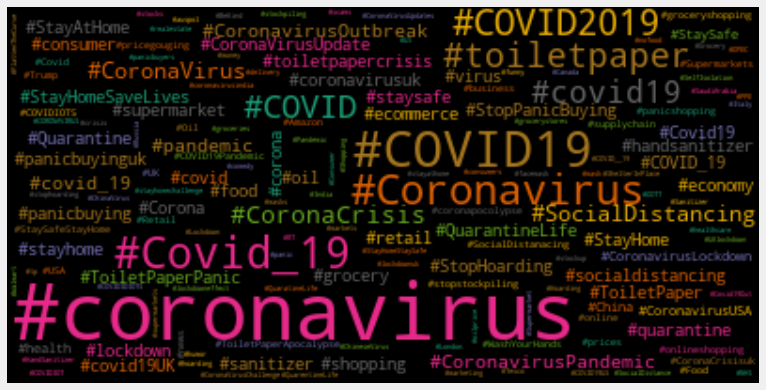

In [36]:
def create_wordCloud(pattern):
    """create word cloud visualization
    
    arguments:
        pattern (str): regex pattern to extract certain text from the data
    """
    data = train["OriginalTweet"].str.extractall(pattern)[0].value_counts()

    data.index = data.index.map(str)                                                       # convert data index to string
    data_wc = WordCloud(max_words = 500, colormap='Dark2_r', 
                        background_color='black').generate_from_frequencies(data)          # generate word cloud

    
    # display the cloud
    fig = plt.figure()
    fig.set_figwidth(12) # set width
    fig.set_figheight(12) # set height

    plt.imshow(data_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
# create word cloud of the most frequently used hashtags
hashtag = r"(#\w+)"
create_wordCloud(hashtag)

In [37]:
#le = LabelEncoder()
data.Sentiment = lb.fit_transform(data.Sentiment)

# split data back into training and validation sets and sets
train = data[: len(train)]
test = data[len(train):].reset_index(drop=True)

# split test test set
X_test = test.OriginalTweet
y_test = test.Sentiment

from sklearn.model_selection import train_test_split
# split training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(train.OriginalTweet,train.Sentiment, test_size=0.2,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
import statsmodels.api as sm

In [39]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=5).fit(X_train)

In [40]:
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [41]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_val)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,confusion_matrix,recall_score,roc_auc_score
from sklearn.metrics import f1_score,precision_recall_curve,roc_curve,ConfusionMatrixDisplay

In [43]:
rfscore=accuracy_score(y_val,rf_pred)

rfscore

0.7371234207968902

In [44]:
log=LogisticRegression(max_iter=10000)
log.fit(X_train,y_train)
log_pred=log.predict(X_val)
acscore=accuracy_score(y_val,log_pred)
acscore

0.7836491739552964

In [45]:
cross_val_score(log, X_train, y_train, cv=5, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.1s finished


0.7752164009111617